<a href="https://colab.research.google.com/github/salmaafiata/Pyhton/blob/main/Tugas_11_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
cd /content/drive/My Drive

/content/drive/My Drive


In [51]:
ls

'Colab Notebooks'/   dataset@   nnmodel_scene/


In [52]:
#import libaries
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [53]:
#load image
imagepaths = paths.list_images("dataset")
data = []
labels = []

In [54]:
#resize image
for imagepath in imagepaths:
  image = Image.open(imagepath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)
  #extract label
  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

In [56]:
#convert label from string to binary
lb = LabelBinarizer()
labels =  lb.fit_transform(labels)

In [57]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [58]:
#split data train and test
(x_train, x_test, y_train, y_test) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(x_train.shape)
print(x_test.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [59]:
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(24, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 24)        3480      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4704)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               470500    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [60]:
opt = Adam(lr=1e-3, decay=1e-3/50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 99ms/step - loss: 1.6140 - accuracy: 0.2420 - val_loss: 1.5718 - val_accuracy: 0.2055
Epoch 2/25
14/14 [==============================] - 1s 88ms/step - loss: 1.4863 - accuracy: 0.3516 - val_loss: 1.3845 - val_accuracy: 0.4589
Epoch 3/25
14/14 [==============================] - 1s 89ms/step - loss: 1.2904 - accuracy: 0.4726 - val_loss: 1.1926 - val_accuracy: 0.5068
Epoch 4/25
14/14 [==============================] - 1s 89ms/step - loss: 1.1154 - accuracy: 0.5251 - val_loss: 1.0756 - val_accuracy: 0.5685
Epoch 5/25
14/14 [==============================] - 1s 90ms/step - loss: 1.0111 - accuracy: 0.5799 - val_loss: 0.9803 - val_accuracy: 0.6370
Epoch 6/25
14/14 [==============================] - 1s 90ms/step - loss: 0.8845 - accuracy: 0.6507 - val_loss: 0.8790 - val_accuracy: 0.6164
Epoch 7/25
14/14 [==============================] - 1s 91ms/step - loss: 0.7407 - accuracy: 0.7215 - val_loss: 0.8546 - val_accuracy: 0.6233
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


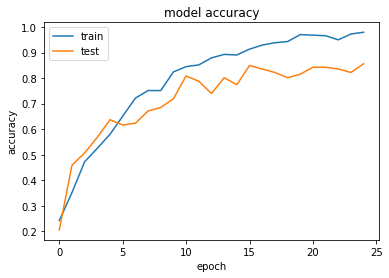

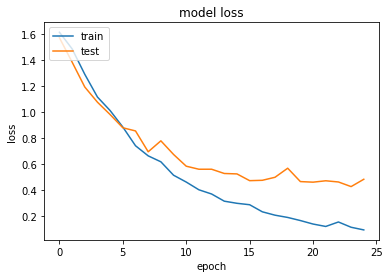

In [61]:
import matplotlib.pyplot as plt

print(H.history.keys())
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
predictions = model1.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      GMB_01       1.00      0.61      0.75        33
      GMB_02       0.69      0.96      0.81        28
      GMB_03       0.89      0.96      0.92        25
      GMB_04       0.90      0.93      0.92        30
      GMB_05       0.90      0.87      0.88        30

    accuracy                           0.86       146
   macro avg       0.88      0.87      0.86       146
weighted avg       0.88      0.86      0.85       146



In [63]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [64]:
ls

'Colab Notebooks'/   dataset@   nnmodel_scene/


In [65]:
cd dataset/GMB_05

/content/drive/.shortcut-targets-by-id/1I-VGR0T_bJr1FNyDtg1QngcCZbCa3h7Y/dataset/GMB_05


In [66]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200814_122725_HDR.jpg'

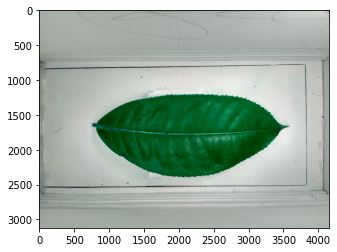

In [67]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [68]:
image_testing = Image.open('IMG_20200814_122725_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [69]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [70]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.9730412e-06 4.4291927e-08 1.8589160e-13 6.7306013e-05 9.9992871e-01]]
['GMB_05']
